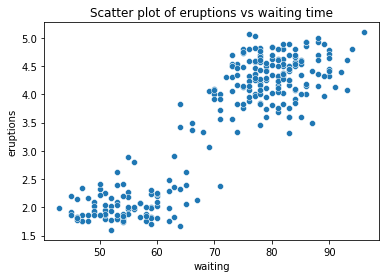

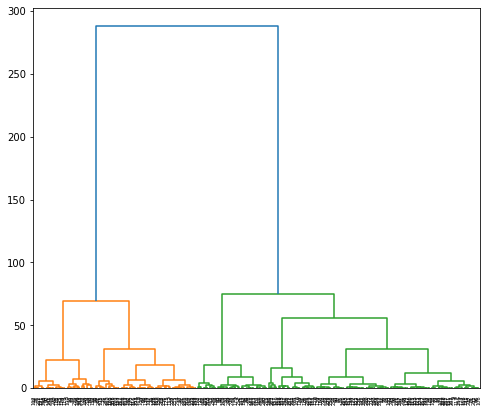

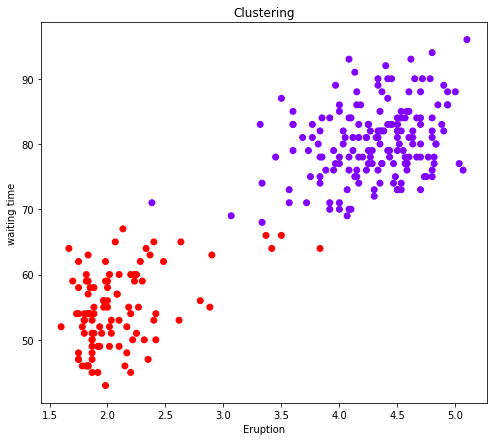

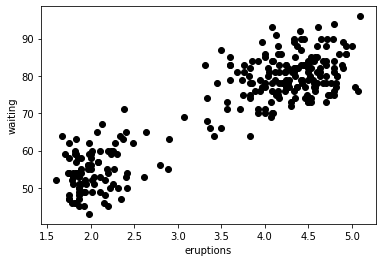

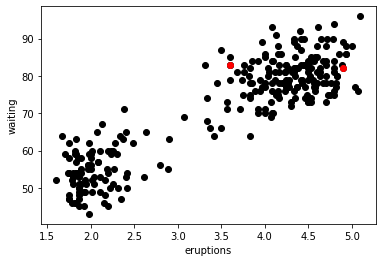

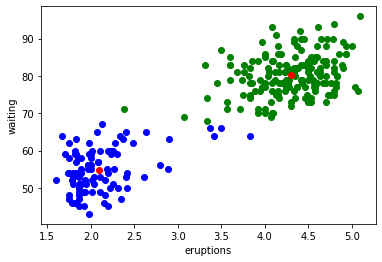

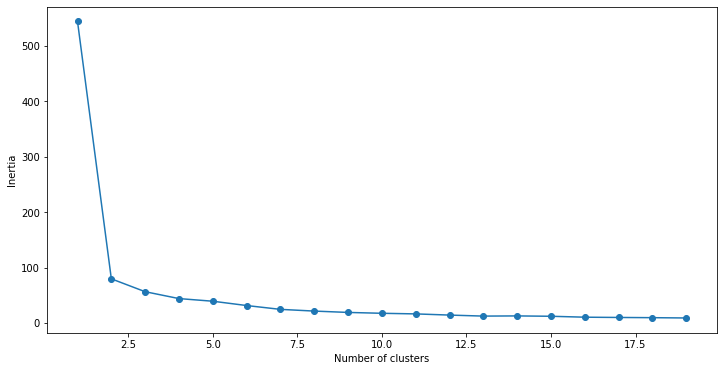

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import random as rd
import matplotlib.pyplot as plt 
# %matplotlib inline
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("/Users/ravi/python/contents/faithful.csv")

data
 #  q1 Scatter plot
sns.scatterplot(x = data['waiting'], y = data['eruptions'])
plt.title("Scatter plot of eruptions vs waiting time")
plt.show()

# We can observe two possible clusters in this data one cluster below 50 mins of waiting time and one above 50.

plt.figure(figsize = (8,7))
Z = linkage(data,'ward')
cluster = dendrogram(Z)
# clustering the data points
cluster = AgglomerativeClustering(n_clusters = 2,affinity = 'euclidean',linkage = 'ward')
cluster.fit_predict(data)
# clustering visualization 
plt.figure(figsize = (8,7))
plt.scatter(data.iloc[:,0],data.iloc[:,1],c= cluster.labels_,cmap = 'rainbow')
plt.title('Clustering')
plt.xlabel('Eruption')
plt.ylabel('waiting time')
plt.show()

# from the above hierarchical clustering we can clearly see that two major clusterings can be taken as next iteration clusterings are to small

# implementing K means algorithm 
plt.scatter(x=data["eruptions"],y=data["waiting"],c='black')
plt.xlabel('eruptions')
plt.ylabel('waiting')
plt.show()
K=2 # from observation of Question 1 we are taking k value as 2
Centroids = (data.sample(n=K))
plt.scatter(x=data["eruptions"],y=data["waiting"],c='black')
plt.scatter(x=Centroids["eruptions"],y=Centroids["waiting"],c='red')
plt.xlabel('eruptions')
plt.ylabel('waiting')
plt.show()
# finding   Euclid distances between the points
diffrence = 1
j=0
while(diffrence!=0):
    XD=data
    i=1
    for index1,row_c in Centroids.iterrows():
        Euclid_Dis=[]
        for index2,row_d in XD.iterrows():
            point1=pow((row_c["eruptions"]-row_d["eruptions"]),2)
            point2=pow((row_c["waiting"]-row_d["waiting"]),2)
            diff=np.sqrt(point1+point2)
            Euclid_Dis.append(diff)
        data[i]=Euclid_Dis
        i=i+1
    # shifting randomly selected  centroids points according to the distances between  the points  
    cent=[]
    for index,row in data.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        cent.append(pos)
    data["Cluster"]=cent
    Centroids_new = data.groupby(["Cluster"]).mean()[["waiting","eruptions"]]
    if j == 0:
        diffrence=1
        j=j+1
    else:
        diffrence = (Centroids_new['waiting'] - Centroids['waiting']).sum() + (Centroids_new['eruptions'] - Centroids['eruptions']).sum()
        #print(diffrence.sum())
    Centroids = data.groupby(["Cluster"]).mean()[["waiting","eruptions"]]
# color coding of centroids 
    color=['blue','green','cyan']
for k in range(K):
    df=data[data["Cluster"]==k+1]
    plt.scatter(df["eruptions"],df["waiting"],c=color[k])
plt.scatter(Centroids["eruptions"],Centroids["waiting"],c='red')
plt.xlabel('eruptions')
plt.ylabel('waiting')
plt.show()

# plotting clustering  of k-means objective function versus iterations of the algorithm

data = pd.read_csv('/Users/ravi/python/contents/faithful.csv')

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(data_scaled)
kmeans.inertia_
sum_sqr_err = []
for cluster in range(1,20):
    kmeans = KMeans(n_init= 1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    sum_sqr_err.append(kmeans.inertia_)


df = pd.DataFrame({'Cluster':range(1,20), 'sum_sqr_err':sum_sqr_err})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'], df['sum_sqr_err'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# 2d yes as observed in question 1 we have two major clusters to  classify , and from the elbow cure  as the clusters keeps on decresing means the algorithm is performing well 